## SF crime data analysis and modeling

### Use Spark SQL for big data analysis on SF crime data. (https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-Historical-2003/tmnf-yvry). 
The first part of Homework is OLAP for scrime data analysis.  
The second part is unsupervised learning for spatial data analysis .   
The option part is the time series data analysis (50 credits). 
**Note**: I download the small data (one month e.g. 2018-10) for debug, then download the data from 2013 to 2018 for testing and analysising. 




### cluster 创建
创建cluster 的时候选择python 3  

### 画图
使用Databricks 自带的画图

In [0]:

from csv import reader
from pyspark.sql import Row 
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings

import os
os.environ["PYSPARK_PYTHON"] = "python3"
#####################


In [0]:
# 从SF gov 官网读取下载数据
# 不要反复执行，大家执行一次就好了啊
# 第二次记得comment 掉
# import urllib.request
# urllib.request.urlretrieve("https://data.sfgov.org/api/views/tmnf-yvry/rows.csv?accessType=DOWNLOAD", "/tmp/myxxxx.csv")
# dbutils.fs.mv("file:/tmp/myxxxx.csv", "dbfs:/laioffer/spark_hw1/data/sf_03_18.csv")
display(dbutils.fs.ls("dbfs:/laioffer/spark_hw1/data/"))
## 或者自己下载
# https://data.sfgov.org/api/views/tmnf-yvry/rows.csv?accessType=DOWNLOAD


path name size modificationTime dbfs:/laioffer/spark_hw1/data/sf_03_18.csv sf_03_18.csv 550945238 1667061854000

In [0]:
data_path = "dbfs:/laioffer/spark_hw1/data/sf_03_18.csv"
# use this file name later

### Solove  big data issues via Spark
approach 1: use RDD 
approach 2: use Dataframe, register the RDD to a dataframe 
approach 3: use SQL   
***note***: I finally chose sql to finish it

In [0]:

from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("crime analysis") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

df_opt1 = spark.read.format("csv").option("header", "true").load(data_path)
display(df_opt1)
# df_opt1.show()
df_opt1.createOrReplaceTempView("sf_crime")

## helper function to transform the date, choose your way to do it. 
# refer: https://jaceklaskowski.gitbooks.io/mastering-spark-sql/spark-sql-functions-datetime.html
# 方法1 使用系统自带udf
# from pyspark.sql.functions import to_date, to_timestamp, hour
# df_opt1 = df_opt1.withColumn('Date', to_date(df_opt1.OccurredOn, "MM/dd/yy"))
# df_opt1 = df_opt1.withColumn('Time', to_timestamp(df_opt1.OccurredOn, "MM/dd/yy HH:mm"))
# df_opt1 = df_opt1.withColumn('Hour', hour(df_opt1['Time']))
# df_opt1 = df_opt1.withColumn("DayOfWeek", date_format(df_opt1.Date, "EEEE"))

## 方法2 手工写udf 
#from pyspark.sql.functions import col, udf
#from pyspark.sql.functions import expr
#from pyspark.sql.functions import from_unixtime

#date_func =  udf (lambda x: datetime.strptime(x, '%m/%d/%Y'), DateType())
#month_func = udf (lambda x: datetime.strptime(x, '%m/%d/%Y').strftime('%Y/%m'), StringType())

#df = df_opt1.withColumn('month_year', month_func(col('Date')))\
#           .withColumn('Date_time', date_func(col('Date')))

## 方法3 手工在sql 里面
# select Date, substring(Date,7) as Year, substring(Date,1,2) as Month from sf_crime


## 方法4: 使用系统自带
# from pyspark.sql.functions import *
# df_update = df_opt1.withColumn("Date", to_date(col("Date"), "MM/dd/yyyy")) ##change datetype from string to date
# df_update.createOrReplaceTempView("sf_crime")
# crimeYearMonth = spark.sql("SELECT Year(Date) AS Year, Month(Date) AS Month, FROM sf_crime")

PdId IncidntNum Incident Code Category Descript DayOfWeek Date Time PdDistrict Resolution Address X Y location SF Find Neighborhoods 2 2 Current Police Districts 2 2 Current Supervisor Districts 2 2 Analysis Neighborhoods 2 2 DELETE - Fire Prevention Districts 2 2 DELETE - Police Districts 2 2 DELETE - Supervisor Districts 2 2 DELETE - Zip Codes 2 2 DELETE - Neighborhoods 2 2 DELETE - 2017 Fix It Zones 2 2 Civic Center Harm Reduction Project Boundary 2 2 Fix It Zones as of 2017-11-06 2 2 DELETE - HSOC Zones 2 2 Fix It Zones as of 2018-02-07 2 2 CBD, BID and GBD Boundaries as of 2017 2 2 Areas of Vulnerability, 2016 2 2 Central Market/Tenderloin Boundary 2 2 Central Market/Tenderloin Boundary Polygon - Updated 2 2 HSOC Zones as of 2018-06-05 2 2 OWED Public Spaces 2 2 Neighborhoods 2 4133422003074 041334220 03074 ROBBERY ROBBERY, BODILY FORCE Monday 11/22/2004 17:50 INGLESIDE NONE GENEVA AV / SANTOS ST -122.420084075249 37.7083109744362 POINT (-122.420084075249 37.7083109744362) null null 9 null null null 8 309 null null null null null null null null null null null null null 5118535807021 051185358 07021 VEHICLE THEFT STOLEN AUTOMOBILE Tuesday 10/18/2005 20:00 PARK NONE TURK ST / STJOSEPHS AV -120.5 90 POINT (-120.50000000000001 90) null null null null null null null null null null null null null null null null null null null null null 4018830907021 040188309 07021 VEHICLE THEFT STOLEN AUTOMOBILE Sunday 02/15/2004 02:00 SOUTHERN NONE BRANNAN ST / 1ST ST -120.5 90 POINT (-120.50000000000001 90) null null null null null null null null null null null null null null null null null null null null null 11014543126030 110145431 26030 ARSON ARSON Friday 02/18/2011 05:27 INGLESIDE NONE 0 Block of SANJUAN AV -122.43622001281 37.7243766140428 POINT (-122.43622001281001 37.7243766140428) 94 9 1 28 9 7 6 28861 25 null null null null null null 1 null null null null 94 10108108004134 101081080 04134 ASSAULT BATTERY Sunday 11/21/2010 17:00 SOUTHERN NONE 400 Block of 10TH ST -122.410541166987 37.7709130566165 POINT (-122.410541166987 37.7709130566165) 32 1 10 34 8 2 9 28853 34 null null null null null null 2 null null null null 32 13027069804134 130270698 04134 ASSAULT BATTERY Tuesday 04/02/2013 15:50 TARAVAL NONE 14TH AV / SANTIAGO ST -122.470365997562 37.74515794927 POINT (-122.470365997562 37.74515794927) 44 10 8 41 1 8 4 29491 40 null null null null null null 1 null null null null 44 17063991304134 170639913 04134 ASSAULT BATTERY Sunday 08/06/2017 18:15 SOUTHERN NONE 800 Block of BRYANT ST -122.40340479147905 37.775420706711 POINT (-122.40340479147905 37.775420706711) 32 1 10 34 14 2 9 28853 34 null null null null null null 2 null null null null 32 16020415607020 160204156 07020 VEHICLE THEFT STOLEN AND RECOVERED VEHICLE Thursday 03/03/2016 19:30 TARAVAL NONE 100 Block of BEPLER ST -122.46354501681947 37.70796836450968 POINT (-122.46354501681947 37.70796836450968) null null null null null null null 28588 null null null null null null null null null null null null null 6068579904134 060685799 04134 ASSAULT BATTERY Saturday 06/17/2006 03:00 TARAVAL NONE 3200 Block of SAN JOSE AV -122.459172646607 37.7082001648459 POINT (-122.459172646607 37.7082001648459) null null null null null null null 28588 null null null null null null null null null null null null null 5134166327195 051341663 27195 TRESPASS TRESPASSING Monday 11/28/2005 16:04 TENDERLOIN ARREST, BOOKED ELLIS ST / 5THSTNORTH ST -120.5 90 POINT (-120.50000000000001 90) null null null null null null null null null null null null null null null null null null null null null 9098843805041 090988438 05041 BURGLARY BURGLARY OF RESIDENCE, FORCIBLE ENTRY Thursday 09/24/2009 13:30 BAYVIEW NONE 1500 Block of SHAFTER AV -122.389849114797 37.7304741509374 POINT (-122.38984911479702 37.7304741509374) 86 2 9 1 10 3 8 58 1 null null null null null null 2 null null null null 86 12620267506244 126202675 06244 LARCENY/THEFT GRAND THEFT FROM LOCKED AUTO Friday 12/21/2012 19:15 CENTRAL NONE PACIFIC AV / GRA

In [0]:
type(df_opt1)

Out[5]: pyspark.sql.dataframe.DataFrame

#### Q1 question (OLAP): 
#####Write a Spark program that counts the number of crimes for different category.

Below are some example codes to demonstrate the way to use Spark RDD, DF, and SQL to work with big data. You can follow this example to finish other questions.

In [0]:
# sql way
# spark.sql(string of SQL)
spark_sql_q1 = spark.sql("SELECT category, COUNT(*) AS Count FROM sf_crime GROUP BY category ORDER BY Count DESC")
# spark_sql_q1 is spark Dataframe
display(spark_sql_q1)
# job -> stage -> task  

category Count LARCENY/THEFT 477975 OTHER OFFENSES 301874 NON-CRIMINAL 236928 ASSAULT 167042 VEHICLE THEFT 126228 DRUG/NARCOTIC 117821 VANDALISM 114718 WARRANTS 99821 BURGLARY 91067 SUSPICIOUS OCC 79087 ROBBERY 54467 MISSING PERSON 44268 FRAUD 41348 FORGERY/COUNTERFEITING 22995 SECONDARY CODES 22378 WEAPON LAWS 21004 TRESPASS 19194 PROSTITUTION 16501 STOLEN PROPERTY 11450 DISORDERLY CONDUCT 9932 DRUNKENNESS 9760 SEX OFFENSES, FORCIBLE 8747 RECOVERED VEHICLE 8688 DRIVING UNDER THE INFLUENCE 5652 KIDNAPPING 4282 ARSON 3875 EMBEZZLEMENT 2984 LIQUOR LAWS 2840 LOITERING 2402 SUICIDE 1291 BAD CHECKS 924 BRIBERY 796 EXTORTION 729 GAMBLING 343 PORNOGRAPHY/OBSCENE MAT 57 SEX OFFENSES, NON FORCIBLE 43 TREA 14

In [0]:
#Spark SQL based
# df way
spark_df_q1 = df_opt1.groupBy('category').count().orderBy('count', ascending=False)
display(spark_df_q1)

# df_opt1 spark Dataframe groupby()-> GroupedData
# GroupedData count()-> sparkDataframe
# sparkDataframe orderBy()-> sparkDataframe
# spark_df_q1 is sparkDataframe


category count LARCENY/THEFT 477975 OTHER OFFENSES 301874 NON-CRIMINAL 236928 ASSAULT 167042 VEHICLE THEFT 126228 DRUG/NARCOTIC 117821 VANDALISM 114718 WARRANTS 99821 BURGLARY 91067 SUSPICIOUS OCC 79087 ROBBERY 54467 MISSING PERSON 44268 FRAUD 41348 FORGERY/COUNTERFEITING 22995 SECONDARY CODES 22378 WEAPON LAWS 21004 TRESPASS 19194 PROSTITUTION 16501 STOLEN PROPERTY 11450 DISORDERLY CONDUCT 9932 DRUNKENNESS 9760 SEX OFFENSES, FORCIBLE 8747 RECOVERED VEHICLE 8688 DRIVING UNDER THE INFLUENCE 5652 KIDNAPPING 4282 ARSON 3875 EMBEZZLEMENT 2984 LIQUOR LAWS 2840 LOITERING 2402 SUICIDE 1291 BAD CHECKS 924 BRIBERY 796 EXTORTION 729 GAMBLING 343 PORNOGRAPHY/OBSCENE MAT 57 SEX OFFENSES, NON FORCIBLE 43 TREA 14

In [0]:
display(spark_df_q1)

category count LARCENY/THEFT 477975 OTHER OFFENSES 301874 NON-CRIMINAL 236928 ASSAULT 167042 VEHICLE THEFT 126228 DRUG/NARCOTIC 117821 VANDALISM 114718 WARRANTS 99821 BURGLARY 91067 SUSPICIOUS OCC 79087 ROBBERY 54467 MISSING PERSON 44268 FRAUD 41348 FORGERY/COUNTERFEITING 22995 SECONDARY CODES 22378 WEAPON LAWS 21004 TRESPASS 19194 PROSTITUTION 16501 STOLEN PROPERTY 11450 DISORDERLY CONDUCT 9932 DRUNKENNESS 9760 SEX OFFENSES, FORCIBLE 8747 RECOVERED VEHICLE 8688 DRIVING UNDER THE INFLUENCE 5652 KIDNAPPING 4282 ARSON 3875 EMBEZZLEMENT 2984 LIQUOR LAWS 2840 LOITERING 2402 SUICIDE 1291 BAD CHECKS 924 BRIBERY 796 EXTORTION 729 GAMBLING 343 PORNOGRAPHY/OBSCENE MAT 57 SEX OFFENSES, NON FORCIBLE 43 TREA 14

In [0]:
# sql way
spark_sql_q1 = spark.sql("SELECT category, COUNT(*) AS Count FROM sf_crime GROUP BY category ORDER BY Count DESC")
display(spark_sql_q1)

category Count LARCENY/THEFT 477975 OTHER OFFENSES 301874 NON-CRIMINAL 236928 ASSAULT 167042 VEHICLE THEFT 126228 DRUG/NARCOTIC 117821 VANDALISM 114718 WARRANTS 99821 BURGLARY 91067 SUSPICIOUS OCC 79087 ROBBERY 54467 MISSING PERSON 44268 FRAUD 41348 FORGERY/COUNTERFEITING 22995 SECONDARY CODES 22378 WEAPON LAWS 21004 TRESPASS 19194 PROSTITUTION 16501 STOLEN PROPERTY 11450 DISORDERLY CONDUCT 9932 DRUNKENNESS 9760 SEX OFFENSES, FORCIBLE 8747 RECOVERED VEHICLE 8688 DRIVING UNDER THE INFLUENCE 5652 KIDNAPPING 4282 ARSON 3875 EMBEZZLEMENT 2984 LIQUOR LAWS 2840 LOITERING 2402 SUICIDE 1291 BAD CHECKS 924 BRIBERY 796 EXTORTION 729 GAMBLING 343 PORNOGRAPHY/OBSCENE MAT 57 SEX OFFENSES, NON FORCIBLE 43 TREA 14

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

In [0]:
#pandas visulization-pandas creation
# spark_sql_q1 is sparkDataframe 
# toPandas() -> pandas dataframe
crimes_pd_df = spark_sql_q1.toPandas()
# crimes_pd_df is pandas dataframe (has its own api)

display(crimes_pd_df)
print (type(crimes_pd_df))

category Count LARCENY/THEFT 477975 OTHER OFFENSES 301874 NON-CRIMINAL 236928 ASSAULT 167042 VEHICLE THEFT 126228 DRUG/NARCOTIC 117821 VANDALISM 114718 WARRANTS 99821 BURGLARY 91067 SUSPICIOUS OCC 79087 ROBBERY 54467 MISSING PERSON 44268 FRAUD 41348 FORGERY/COUNTERFEITING 22995 SECONDARY CODES 22378 WEAPON LAWS 21004 TRESPASS 19194 PROSTITUTION 16501 STOLEN PROPERTY 11450 DISORDERLY CONDUCT 9932 DRUNKENNESS 9760 SEX OFFENSES, FORCIBLE 8747 RECOVERED VEHICLE 8688 DRIVING UNDER THE INFLUENCE 5652 KIDNAPPING 4282 ARSON 3875 EMBEZZLEMENT 2984 LIQUOR LAWS 2840 LOITERING 2402 SUICIDE 1291 BAD CHECKS 924 BRIBERY 796 EXTORTION 729 GAMBLING 343 PORNOGRAPHY/OBSCENE MAT 57 SEX OFFENSES, NON FORCIBLE 43 TREA 14

<class 'pandas.core.frame.DataFrame'>


<Figure size 432x288 with 0 Axes>

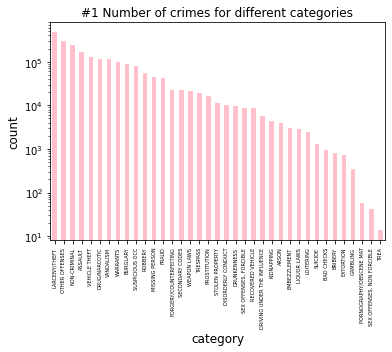

In [0]:
##1 Pandas visulization-Plot
plt.figure()
#plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
#plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False
ax = crimes_pd_df.plot(kind = 'bar',x = 'category',y = 'Count',logy= True,color = 'pink',legend = False, align = 'center')
ax.set_ylabel('count',fontsize = 12)
ax.set_xlabel('category',fontsize = 12)
plt.xticks(fontsize=5, rotation=90)
plt.title('#1 Number of crimes for different categories')
display()

In [0]:
# df way
spark_df_q1 = df_opt1.groupBy('category').count().orderBy('count', ascending=False)
display(spark_df_q1)

category count LARCENY/THEFT 477975 OTHER OFFENSES 301874 NON-CRIMINAL 236928 ASSAULT 167042 VEHICLE THEFT 126228 DRUG/NARCOTIC 117821 VANDALISM 114718 WARRANTS 99821 BURGLARY 91067 SUSPICIOUS OCC 79087 ROBBERY 54467 MISSING PERSON 44268 FRAUD 41348 FORGERY/COUNTERFEITING 22995 SECONDARY CODES 22378 WEAPON LAWS 21004 TRESPASS 19194 PROSTITUTION 16501 STOLEN PROPERTY 11450 DISORDERLY CONDUCT 9932 DRUNKENNESS 9760 SEX OFFENSES, FORCIBLE 8747 RECOVERED VEHICLE 8688 DRIVING UNDER THE INFLUENCE 5652 KIDNAPPING 4282 ARSON 3875 EMBEZZLEMENT 2984 LIQUOR LAWS 2840 LOITERING 2402 SUICIDE 1291 BAD CHECKS 924 BRIBERY 796 EXTORTION 729 GAMBLING 343 PORNOGRAPHY/OBSCENE MAT 57 SEX OFFENSES, NON FORCIBLE 43 TREA 14

#### Q2 question (OLAP)
Counts the number of crimes for different district, and visualize your results

In [0]:
# sql way
spark_sql_q2 = spark.sql("SELECT PdDistrict, COUNT(*) AS Count FROM sf_crime GROUP BY 1 ORDER BY 2 DESC")
display(spark_sql_q2)

PdDistrict Count SOUTHERN 390692 MISSION 288985 NORTHERN 266435 CENTRAL 221923 BAYVIEW 205480 TENDERLOIN 186954 INGLESIDE 181092 TARAVAL 155461 PARK 119698 RICHMOND 112804 NA 1

In [0]:
# df way
spark_df_q2 = df_opt1.groupBy('PdDistrict').count().orderBy('Count', ascending=False)
display(spark_df_q2)

PdDistrict count SOUTHERN 390692 MISSION 288985 NORTHERN 266435 CENTRAL 221923 BAYVIEW 205480 TENDERLOIN 186954 INGLESIDE 181092 TARAVAL 155461 PARK 119698 RICHMOND 112804 NA 1

<Figure size 432x288 with 0 Axes>

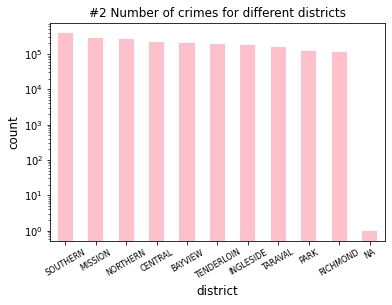

In [0]:
##2 Data Visulization 
crimes_dis_pd_df = spark_sql_q2.toPandas()
plt.figure()

ax = crimes_dis_pd_df.plot(kind = 'bar',x='PdDistrict',y = 'Count',logy= True,color = 'pink',legend = False, align = 'center')
ax.set_ylabel('count',fontsize = 12)
ax.set_xlabel('district',fontsize = 12)
plt.xticks(fontsize=8, rotation=30)
plt.title('#2 Number of crimes for different districts')
display()

#### Q3 question (OLAP)
Count the number of crimes each "Sunday" at "SF downtown".   
hint 1: SF downtown is defiend  via the range of spatial location. For example, you can use a rectangle to define the SF downtown, or you can define a cicle with center as well. Thus, you need to write your own UDF function to filter data which are located inside certain spatial range. You can follow the example here: https://changhsinlee.com/pyspark-udf/

hint 2: SF downtown 物理范围可以是 rectangle a < x < b  and c < y < d. thus, San Francisco Latitude and longitude coordinates are: 37.773972, -122.431297. X and Y represents each. So we assume SF downtown spacial range: X (-122.4213,-122.4313), Y(37.7540,37.7740). 也可以是中心一个圈，距离小于多少算做downtown

method1: spark sql

In [0]:
q3_result = spark.sql("""
                      with Sunday_dt_crime as(
                      select substring(Date,1,5) as Date,
                             substring(Date,7) as Year
                      from sf_crime
                      where (DayOfWeek = 'Sunday'
                             and -122.423671 < X
                             and X < 122.412497
                             and 37.773510 < Y
                             and Y < 37.782137)
                             )
                             
                      select Year, Date, COUNT(*) as Count
                      from Sunday_dt_crime
                      group by Year, Date
                      order by Year, Date
                      """)
display(q3_result)

Year Date Count 2003 01/05 28 2003 01/12 33 2003 01/19 19 2003 01/26 32 2003 02/02 44 2003 02/09 46 2003 02/16 50 2003 02/23 48 2003 03/02 40 2003 03/09 49 2003 03/16 43 2003 03/23 32 2003 03/30 45 2003 04/06 41 2003 04/13 44 2003 04/20 42 2003 04/27 43 2003 05/04 33 2003 05/11 30 2003 05/18 49 2003 05/25 39 2003 06/01 75 2003 06/08 37 2003 06/15 41 2003 06/22 38 2003 06/29 65 2003 07/06 36 2003 07/13 47 2003 07/20 48 2003 07/27 34 2003 08/03 39 2003 08/10 42 2003 08/17 26 2003 08/24 40 2003 08/31 38 2003 09/07 41 2003 09/14 38 2003 09/21 44 2003 09/28 39 2003 10/05 37 2003 10/12 39 2003 10/19 37 2003 10/26 29 2003 11/02 30 2003 11/09 44 2003 11/16 36 2003 11/23 35 2003 11/30 35 2003 12/07 39 2003 12/14 22 2003 12/21 43 2003 12/28 31 2004 01/04 49 2004 01/11 28 2004 01/18 24 2004 01/25 46 2004 02/01 39 2004 02/08 42 2004 02/15 50 2004 02/22 35 2004 02/29 48 2004 03/07 33 2004 03/14 50 2004 03/21 31 2004 03/28 37 2004 04/04 38 2004 04/11 48 2004 04/18 46 2004 04/25 47 2004 05/02 47 2004 05/09 30 2004 05/16 40 2004 05/23 33 2004 05/30 49 2004 06/06 17 2004 06/13 38 2004 06/20 53 2004 06/27 64 2004 07/04 50 2004 07/11 39 2004 07/18 45 2004 07/25 43 2004 08/01 58 2004 08/08 39 2004 08/15 39 2004 08/22 47 2004 08/29 43 2004 09/05 40 2004 09/12 42 2004 09/19 27 2004 09/26 45 2004 10/03 23 2004 10/10 38 2004 10/17 39 2004 10/24 47 2004 10/31 43 2004 11/07 37 2004 11/14 35 2004 11/21 33 2004 11/28 41 2004 12/05 38 2004 12/12 40 2004 12/19 41 2004 12/26 23 2005 01/02 29 2005 01/09 26 2005 01/16 40 2005 01/23 46 2005 01/30 50 2005 02/06 38 2005 02/13 36 2005 02/20 38 2005 02/27 35 2005 03/06 35 2005 03/13 49 2005 03/20 51 2005 03/27 25 2005 04/03 37 2005 04/10 51 2005 04/17 33 2005 04/24 39 2005 05/01 52 2005 05/08 69 2005 05/15 41 2005 05/22 49 2005 05/29 47 2005 06/05 34 2005 06/12 37 2005 06/19 46 2005 06/26 64 2005 07/03 44 2005 07/10 43 2005 07/17 42 2005 07/24 34 2005 07/31 41 2005 08/07 50 2005 08/14 48 2005 08/21 49 2005 08/28 35 2005 09/04 34 2005 09/11 34 2005 09/18 40 2005 09/25 50 2005 10/02 38 2005 10/09 34 2005 10/16 40 2005 10/23 24 2005 10/30 32 2005 11/06 49 2005 11/13 50 2005 11/20 42 2005 11/27 34 2005 12/04 42 2005 12/11 38 2005 12/18 31 2005 12/25 23 2006 01/01 77 2006 01/08 50 2006 01/15 48 2006 01/22 48 2006 01/29 44 2006 02/05 38 2006 02/12 41 2006 02/19 54 2006 02/26 40 2006 03/05 50 2006 03/12 34 2006 03/19 56 2006 03/26 52 2006 04/02 45 2006 04/09 38 2006 04/16 36 2006 04/23 50 2006 04/30 44 2006 05/07 53 2006 05/14 46 2006 05/21 48 2006 05/28 49 2006 06/04 39 2006 06/11 43 2006 06/18 51 2006 06/25 41 2006 07/02 35 2006 07/09 40 2006 07/16 41 2006 07/23 43 2006 07/30 50 2006 08/06 49 2006 08/13 47 2006 08/20 36 2006 08/27 48 2006 09/03 27 2006 09/10 54 2006 09/17 48 2006 09/24 51 2006 10/01 47 2006 10/08 57 2006 10/15 42 2006 10/22 41 2006 10/29 51 2006 11/05 34 2006 11/12 35 2006 11/19 44 2006 11/26 38 2006 12/03 52 2006 12/10 36 2006 12/17 36 2006 12/24 27 2006 12/31 53 2007 01/07 52 2007 01/14 33 2007 01/21 41 2007 01/28 42 2007 02/04 48 2007 02/11 42 2007 02/18 46 2007 02/25 48 2007 03/04 58 2007 03/11 41 2007 03/18 44 2007 03/25 47 2007 04/01 57 2007 04/08 40 2007 04/15 41 2007 04/22 64 2007 04/29 33 2007 05/06 68 2007 05/13 41 2007 05/20 60 2007 05/27 43 2007 06/03 43 2007 06/10 41 2007 06/17 33 2007 06/24 61 2007 07/01 53 2007 07/08 57 2007 07/15 58 2007 07/22 42 2007 07/29 57 2007 08/05 41 2007 08/12 60 2007 08/19 58 2007 08/26 52 2007 09/02 31 2007 09/09 58 2007 09/16 52 2007 09/23 46 2007 09/30 70 2007 10/07 56 2007 10/14 51 2007 10/21 45 2007 10/28 51 2007 11/04 44 2007 11/11 40 2007 11/18 43 2007 11/25 40 2007 12/02 47 2007 12/09 44 2007 12/23 48 2007 12/30 39 2008 01/06 43 2008 01/13 47 2008 01/20 30 2008 01/27 39 2008 02/03 36 2008 02/10 36 2008 02/17 31 2008 02/24 43 2008 03/02 64 2008 03/09 44 2008 03/16 49 2008 03/23 39 2008 03/30 44 2008 04/06 38 2008 04/13 48 2008 04/20 40 2008 04/27 37 2008 05/04 44 2008 05/11 39 2008 05/18 44 2008 05/25 45 2008 06/01 75 2008 06/08 56 2008 06/15 53 2008 06/

method2: dataframe

In [0]:
df_opt2 = df_opt1[['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location']]
display(df_opt2)
df_opt2.createOrReplaceTempView("sf_crime")

IncidntNum Category Descript DayOfWeek Date Time PdDistrict Resolution Address X Y Location 041334220 ROBBERY ROBBERY, BODILY FORCE Monday 11/22/2004 17:50 INGLESIDE NONE GENEVA AV / SANTOS ST -122.420084075249 37.7083109744362 POINT (-122.420084075249 37.7083109744362) 051185358 VEHICLE THEFT STOLEN AUTOMOBILE Tuesday 10/18/2005 20:00 PARK NONE TURK ST / STJOSEPHS AV -120.5 90 POINT (-120.50000000000001 90) 040188309 VEHICLE THEFT STOLEN AUTOMOBILE Sunday 02/15/2004 02:00 SOUTHERN NONE BRANNAN ST / 1ST ST -120.5 90 POINT (-120.50000000000001 90) 110145431 ARSON ARSON Friday 02/18/2011 05:27 INGLESIDE NONE 0 Block of SANJUAN AV -122.43622001281 37.7243766140428 POINT (-122.43622001281001 37.7243766140428) 101081080 ASSAULT BATTERY Sunday 11/21/2010 17:00 SOUTHERN NONE 400 Block of 10TH ST -122.410541166987 37.7709130566165 POINT (-122.410541166987 37.7709130566165) 130270698 ASSAULT BATTERY Tuesday 04/02/2013 15:50 TARAVAL NONE 14TH AV / SANTIAGO ST -122.470365997562 37.74515794927 POINT (-122.470365997562 37.74515794927) 170639913 ASSAULT BATTERY Sunday 08/06/2017 18:15 SOUTHERN NONE 800 Block of BRYANT ST -122.40340479147905 37.775420706711 POINT (-122.40340479147905 37.775420706711) 160204156 VEHICLE THEFT STOLEN AND RECOVERED VEHICLE Thursday 03/03/2016 19:30 TARAVAL NONE 100 Block of BEPLER ST -122.46354501681947 37.70796836450968 POINT (-122.46354501681947 37.70796836450968) 060685799 ASSAULT BATTERY Saturday 06/17/2006 03:00 TARAVAL NONE 3200 Block of SAN JOSE AV -122.459172646607 37.7082001648459 POINT (-122.459172646607 37.7082001648459) 051341663 TRESPASS TRESPASSING Monday 11/28/2005 16:04 TENDERLOIN ARREST, BOOKED ELLIS ST / 5THSTNORTH ST -120.5 90 POINT (-120.50000000000001 90) 090988438 BURGLARY BURGLARY OF RESIDENCE, FORCIBLE ENTRY Thursday 09/24/2009 13:30 BAYVIEW NONE 1500 Block of SHAFTER AV -122.389849114797 37.7304741509374 POINT (-122.38984911479702 37.7304741509374) 126202675 LARCENY/THEFT GRAND THEFT FROM LOCKED AUTO Friday 12/21/2012 19:15 CENTRAL NONE PACIFIC AV / GRANT AV -122.406831986427 37.7969028838908 POINT (-122.40683198642701 37.7969028838908) 041138389 WARRANTS ENROUTE TO DEPARTMENT OF CORRECTIONS Tuesday 10/05/2004 10:18 TENDERLOIN ARREST, BOOKED ELLIS ST / JONES ST -122.412784096509 37.7848656939297 POINT (-122.412784096509 37.7848656939297) 100145388 OTHER OFFENSES DRIVERS LICENSE, SUSPENDED OR REVOKED Saturday 02/13/2010 02:55 BAYVIEW ARREST, CITED POWELL ST / VALLEJO ST -122.41045954645 37.7983714449989 POINT (-122.41045954645001 37.7983714449989) 100033125 OTHER OFFENSES DRIVERS LICENSE, SUSPENDED OR REVOKED Monday 01/11/2010 03:38 SOUTHERN ARREST, BOOKED 6TH ST / MISSION ST -122.408710606663 37.7809706722053 POINT (-122.408710606663 37.7809706722053) 120714349 TRESPASS TRESPASSING Friday 08/17/2012 20:30 NORTHERN NONE 1900 Block of PACIFIC AV -122.427363308517 37.7943446897793 POINT (-122.427363308517 37.7943446897793) 100180889 LARCENY/THEFT PETTY THEFT SHOPLIFTING Tuesday 02/23/2010 17:57 SOUTHERN ARREST, CITED 800 Block of MARKET ST -122.406520987144 37.7850629421661 POINT (-122.40652098714399 37.7850629421661) 040829218 ROBBERY ROBBERY OF A COMMERCIAL ESTABLISHMENT WITH A GUN Wednesday 07/21/2004 07:30 TENDERLOIN NONE 200 Block of LEAVENWORTH ST -122.414081138014 37.7832767266062 POINT (-122.41408113801401 37.7832767266062) 030716039 DRUG/NARCOTIC POSSESSION OF HEROIN Thursday 06/12/2003 20:25 INGLESIDE ARREST, BOOKED BANNOCK ST / SENECA AV -122.441875049315 37.7190816366737 POINT (-122.44187504931502 37.7190816366737) 126018074 LARCENY/THEFT GRAND THEFT OF PROPERTY Monday 02/06/2012 18:00 MISSION NONE MARKET ST / SANCHEZ ST -122.431028702713 37.7658672394532 POINT (-122.43102870271298 37.7658672394532) 060388705 SUSPICIOUS OCC SUSPICIOUS OCCURRENCE Tuesday 04/11/2006 16:00 SOUTHERN NONE 200 Block of 6TH ST -122.406346425632 37.7791674218963 POINT (-122.40634642563201 37.7791674218963) 040725741 LARCENY/THEFT GRAND THEFT PICKPOCKET Saturday 05/22/2004 15:00 NORTHERN NONE HAIGHT ST /

In [0]:
from pyspark.sql.functions import hour, date_format, to_date, month, year
# add new columns to convert Date to date format
df_new = df_opt2.withColumn("IncidentDate",to_date(df_opt2.Date, "MM/dd/yyyy")) 
# extract month and year from incident date
df_new = df_new.withColumn('Month',month(df_new['IncidentDate']))
df_new = df_new.withColumn('Year', year(df_new['IncidentDate']))
display(df_new.take(5))

IncidntNum Category Descript DayOfWeek Date Time PdDistrict Resolution Address X Y Location IncidentDate Month Year 041334220 ROBBERY ROBBERY, BODILY FORCE Monday 11/22/2004 17:50 INGLESIDE NONE GENEVA AV / SANTOS ST -122.420084075249 37.7083109744362 POINT (-122.420084075249 37.7083109744362) 2004-11-22 11 2004 051185358 VEHICLE THEFT STOLEN AUTOMOBILE Tuesday 10/18/2005 20:00 PARK NONE TURK ST / STJOSEPHS AV -120.5 90 POINT (-120.50000000000001 90) 2005-10-18 10 2005 040188309 VEHICLE THEFT STOLEN AUTOMOBILE Sunday 02/15/2004 02:00 SOUTHERN NONE BRANNAN ST / 1ST ST -120.5 90 POINT (-120.50000000000001 90) 2004-02-15 2 2004 110145431 ARSON ARSON Friday 02/18/2011 05:27 INGLESIDE NONE 0 Block of SANJUAN AV -122.43622001281 37.7243766140428 POINT (-122.43622001281001 37.7243766140428) 2011-02-18 2 2011 101081080 ASSAULT BATTERY Sunday 11/21/2010 17:00 SOUTHERN NONE 400 Block of 10TH ST -122.410541166987 37.7709130566165 POINT (-122.410541166987 37.7709130566165) 2010-11-21 11 2010

In [0]:
# df way
sf_downtown = (df_new.X > -122.4313) & (df_new.X < -122.4213) & (df_new.Y < 37.7740) & (df_new.Y > 37.7540 )
spark_df_q3 = df_new.filter((df_new.DayOfWeek == "Sunday") & (sf_downtown)).groupby('IncidentDate','DayOfWeek').count().orderBy('IncidentDate')

In [0]:
display(spark_df_q3)

IncidentDate DayOfWeek count 2003-01-05 Sunday 13 2003-01-12 Sunday 20 2003-01-19 Sunday 17 2003-01-26 Sunday 13 2003-02-02 Sunday 14 2003-02-09 Sunday 22 2003-02-16 Sunday 12 2003-02-23 Sunday 14 2003-03-02 Sunday 16 2003-03-09 Sunday 8 2003-03-16 Sunday 18 2003-03-23 Sunday 9 2003-03-30 Sunday 20 2003-04-06 Sunday 8 2003-04-13 Sunday 13 2003-04-20 Sunday 13 2003-04-27 Sunday 5 2003-05-04 Sunday 9 2003-05-11 Sunday 5 2003-05-18 Sunday 16 2003-05-25 Sunday 10 2003-06-01 Sunday 11 2003-06-08 Sunday 25 2003-06-15 Sunday 6 2003-06-22 Sunday 6 2003-06-29 Sunday 16 2003-07-06 Sunday 10 2003-07-13 Sunday 17 2003-07-20 Sunday 17 2003-07-27 Sunday 8 2003-08-03 Sunday 6 2003-08-10 Sunday 5 2003-08-17 Sunday 11 2003-08-24 Sunday 10 2003-08-31 Sunday 8 2003-09-07 Sunday 13 2003-09-14 Sunday 10 2003-09-21 Sunday 10 2003-09-28 Sunday 7 2003-10-05 Sunday 14 2003-10-12 Sunday 13 2003-10-19 Sunday 11 2003-10-26 Sunday 16 2003-11-02 Sunday 17 2003-11-09 Sunday 16 2003-11-16 Sunday 10 2003-11-23 Sunday 14 2003-11-30 Sunday 6 2003-12-07 Sunday 4 2003-12-14 Sunday 10 2003-12-21 Sunday 12 2003-12-28 Sunday 11 2004-01-04 Sunday 14 2004-01-11 Sunday 15 2004-01-18 Sunday 6 2004-01-25 Sunday 22 2004-02-01 Sunday 16 2004-02-08 Sunday 20 2004-02-15 Sunday 11 2004-02-22 Sunday 18 2004-02-29 Sunday 11 2004-03-07 Sunday 16 2004-03-14 Sunday 8 2004-03-21 Sunday 8 2004-03-28 Sunday 12 2004-04-04 Sunday 13 2004-04-11 Sunday 15 2004-04-18 Sunday 10 2004-04-25 Sunday 11 2004-05-02 Sunday 12 2004-05-09 Sunday 16 2004-05-16 Sunday 22 2004-05-23 Sunday 5 2004-05-30 Sunday 15 2004-06-06 Sunday 16 2004-06-13 Sunday 10 2004-06-20 Sunday 10 2004-06-27 Sunday 11 2004-07-04 Sunday 10 2004-07-11 Sunday 11 2004-07-18 Sunday 18 2004-07-25 Sunday 11 2004-08-01 Sunday 16 2004-08-08 Sunday 13 2004-08-15 Sunday 8 2004-08-22 Sunday 12 2004-08-29 Sunday 22 2004-09-05 Sunday 15 2004-09-12 Sunday 9 2004-09-19 Sunday 21 2004-09-26 Sunday 14 2004-10-03 Sunday 13 2004-10-10 Sunday 18 2004-10-17 Sunday 15 2004-10-24 Sunday 19 2004-10-31 Sunday 31 2004-11-07 Sunday 14 2004-11-14 Sunday 18 2004-11-21 Sunday 10 2004-11-28 Sunday 8 2004-12-05 Sunday 9 2004-12-12 Sunday 10 2004-12-19 Sunday 12 2004-12-26 Sunday 7 2005-01-02 Sunday 8 2005-01-09 Sunday 16 2005-01-16 Sunday 8 2005-01-23 Sunday 10 2005-01-30 Sunday 10 2005-02-06 Sunday 10 2005-02-13 Sunday 7 2005-02-20 Sunday 14 2005-02-27 Sunday 10 2005-03-06 Sunday 14 2005-03-13 Sunday 13 2005-03-20 Sunday 8 2005-03-27 Sunday 6 2005-04-03 Sunday 18 2005-04-10 Sunday 16 2005-04-17 Sunday 4 2005-04-24 Sunday 11 2005-05-01 Sunday 11 2005-05-08 Sunday 12 2005-05-15 Sunday 7 2005-05-22 Sunday 6 2005-05-29 Sunday 10 2005-06-05 Sunday 9 2005-06-12 Sunday 10 2005-06-19 Sunday 12 2005-06-26 Sunday 18 2005-07-03 Sunday 12 2005-07-10 Sunday 14 2005-07-17 Sunday 9 2005-07-24 Sunday 13 2005-07-31 Sunday 10 2005-08-07 Sunday 10 2005-08-14 Sunday 3 2005-08-21 Sunday 11 2005-08-28 Sunday 13 2005-09-04 Sunday 9 2005-09-11 Sunday 8 2005-09-18 Sunday 5 2005-09-25 Sunday 19 2005-10-02 Sunday 16 2005-10-09 Sunday 25 2005-10-16 Sunday 7 2005-10-23 Sunday 9 2005-10-30 Sunday 9 2005-11-06 Sunday 8 2005-11-13 Sunday 11 2005-11-20 Sunday 16 2005-11-27 Sunday 13 2005-12-04 Sunday 16 2005-12-11 Sunday 6 2005-12-18 Sunday 7 2005-12-25 Sunday 15 2006-01-01 Sunday 20 2006-01-08 Sunday 14 2006-01-15 Sunday 4 2006-01-22 Sunday 11 2006-01-29 Sunday 13 2006-02-05 Sunday 11 2006-02-12 Sunday 11 2006-02-19 Sunday 20 2006-02-26 Sunday 9 2006-03-05 Sunday 7 2006-03-12 Sunday 6 2006-03-19 Sunday 13 2006-03-26 Sunday 10 2006-04-02 Sunday 16 2006-04-09 Sunday 14 2006-04-16 Sunday 7 2006-04-23 Sunday 12 2006-04-30 Sunday 12 2006-05-07 Sunday 7 2006-05-14 Sunday 14 2006-05-21 Sunday 18 2006-05-28 Sunday 13 2006-06-04 Sunday 9 2006-06-11 Sunday 9 2006-06-18 Sunday 10 2006-06-25 Sunday 18 2006-07-02 Sunday 20 2006-07-09 Sunday 12 2006-07-16 Sunday 22 2006-07-23 Sunday 15 2006-07-30 Sunday 26 2006-08-06 Sunday 6 2006-08-13 Sunday 21 2006-08-20 Sunday 16 2006-08-27 Sunday 16 2006-09-03 Su

###Q3 Answer
The number of crimes at each Sunday at SF Downtown is shown above.
The SF Downtown is defined in a retangluar area where (-122.423671 ≤ X ≤ 122.412497) and (37.773510 ≤ Y ≤ 37.782137).

#### Q4 question (OLAP)
Analysis the number of crime in each month of 2015, 2016, 2017, 2018. Then, give your insights for the output results. What is the business impact for your result?

###### Q4_Spark Dataframe Way

##method1 spark sql

In [0]:
df_opt2.createOrReplaceTempView('sf_crime')


In [0]:
# substring(string, start, length)
# difference between where and having
# where on: row's data (before groupby)
# having on: on aggregated data (after groupby)
spark_sql_q4 = spark.sql("""
                       SELECT SUBSTRING(Date,1,2) AS Month, SUBSTRING(Date,7,4) AS Year, COUNT(*) AS Count
                       FROM sf_crime
                       GROUP BY Year, Month
                       HAVING Year in (2015, 2016, 2017, 2018) 
                       ORDER BY Year, Month
                       """)
display(spark_sql_q4)


Month Year Count 01 2015 13181 02 2015 11882 03 2015 13463 04 2015 12526 05 2015 13318 06 2015 12853 07 2015 12949 08 2015 13317 09 2015 12476 10 2015 12697 11 2015 11691 12 2015 11106 01 2016 12532 02 2016 11743 03 2016 11950 04 2016 11905 05 2016 12313 06 2016 11727 07 2016 11832 08 2016 12104 09 2016 12092 10 2016 12913 11 2016 12254 12 2016 12629 01 2017 12687 02 2017 11780 03 2017 13250 04 2017 12452 05 2017 12758 06 2017 12186 07 2017 12717 08 2017 12428 09 2017 12204 10 2017 12970 11 2017 11940 12 2017 12115 01 2018 11667 02 2018 9565 03 2018 10354 04 2018 9954 05 2018 3519

##method2 %sql

In [0]:
%sql

SELECT SUBSTRING(Date,1,2) AS Month, SUBSTRING(Date,7,4) AS Year,COUNT(*) AS Count
FROM sf_crime
GROUP BY Year, Month
HAVING Year in (2015, 2016, 2017, 2018) 
ORDER BY Year, Month

--可由spark sql格式替换为%sql格式


Month Year Count 01 2015 13181 02 2015 11882 03 2015 13463 04 2015 12526 05 2015 13318 06 2015 12853 07 2015 12949 08 2015 13317 09 2015 12476 10 2015 12697 11 2015 11691 12 2015 11106 01 2016 12532 02 2016 11743 03 2016 11950 04 2016 11905 05 2016 12313 06 2016 11727 07 2016 11832 08 2016 12104 09 2016 12092 10 2016 12913 11 2016 12254 12 2016 12629 01 2017 12687 02 2017 11780 03 2017 13250 04 2017 12452 05 2017 12758 06 2017 12186 07 2017 12717 08 2017 12428 09 2017 12204 10 2017 12970 11 2017 11940 12 2017 12115 01 2018 11667 02 2018 9565 03 2018 10354 04 2018 9954 05 2018 3519

### method3 sql

In [0]:
%sql
with Monthly_crime as(
select Date,
       substring(Date,7) as Year,      --从第一个开始，第七个字符开始是year
       substring(Date,1,2) as Month    --从第一个开始，到第二个字符，是month
from sf_crime
)

-- select * from Monthly_crime
-- #Date Year Month
-- #01/22/2017  2017  01

-- string.substring(start, end)
-- Parameter	Description
-- start	Required. The position where to start the extraction. First character is at index 0
-- end	Optional. The position (up to, but not including) where to end the extraction. If omitted, it extracts the rest of the string


select Month, COUNT(*) as Count
from Monthly_crime
where Year in ('2015', '2016', '2017','2018')
group by Month
order by Month

Month Count 01 50067 02 44970 03 49017 04 46837 05 41908 06 36766 07 37498 08 37849 09 36772 10 38580 11 35885 12 35850

In [0]:
# Show the number of crime in each month in 2015-2018
q4_result = spark.sql("""
                      with Monthly_crime as(
                      select Date,
                             substring(Date,7) as Year,
                             substring(Date,1,2) as Month
                      from sf_crime
                      )
                      
                      select Year, Month, COUNT(*) as Count
                      from Monthly_crime
                      where Year in ('2015', '2016', '2017', '2018')
                      group by Year, Month
                      order by Year, Month
                      """)
display(q4_result)

Year Month Count 2015 01 13181 2015 02 11882 2015 03 13463 2015 04 12526 2015 05 13318 2015 06 12853 2015 07 12949 2015 08 13317 2015 09 12476 2015 10 12697 2015 11 11691 2015 12 11106 2016 01 12532 2016 02 11743 2016 03 11950 2016 04 11905 2016 05 12313 2016 06 11727 2016 07 11832 2016 08 12104 2016 09 12092 2016 10 12913 2016 11 12254 2016 12 12629 2017 01 12687 2017 02 11780 2017 03 13250 2017 04 12452 2017 05 12758 2017 06 12186 2017 07 12717 2017 08 12428 2017 09 12204 2017 10 12970 2017 11 11940 2017 12 12115 2018 01 11667 2018 02 9565 2018 03 10354 2018 04 9954 2018 05 3519

In [0]:

# Show the number of larceny/theft in each month in 2015-2018
q4_result = spark.sql("""
                      with Monthly_crime as(
                      select Date,
                             substring(Date,7) as Year,
                             substring(Date,1,2) as Month
                      from sf_crime
                      where Category = 'LARCENY/THEFT'
                      )
                      
                      select Year, Month, COUNT(*) as Count
                      from Monthly_crime
                      where Year in ('2015', '2016', '2017', '2018')
                      group by Year, Month
                      order by Year, Month
                      """)
display(q4_result)

Year Month Count 2015 01 3705 2015 02 3276 2015 03 3811 2015 04 3478 2015 05 3837 2015 06 3749 2015 07 3873 2015 08 3694 2015 09 3422 2015 10 3264 2015 11 2939 2015 12 2932 2016 01 3460 2016 02 3198 2016 03 2959 2016 04 2870 2016 05 3396 2016 06 3356 2016 07 3410 2016 08 3321 2016 09 3352 2016 10 3749 2016 11 3460 2016 12 3834 2017 01 3852 2017 02 3618 2017 03 3846 2017 04 3757 2017 05 4065 2017 06 4083 2017 07 4158 2017 08 3820 2017 09 3781 2017 10 4457 2017 11 4218 2017 12 4059 2018 01 3816 2018 02 2906 2018 03 3100 2018 04 2919 2018 05 869

### method4 dataframe

In [0]:
years = [2015, 2016, 2017, 2018]
df_years = df_new[df_new.Year.isin(years)]
display(df_years.take(5))

IncidntNum Category Descript DayOfWeek Date Time PdDistrict Resolution Address X Y Location IncidentDate Month Year 170639913 ASSAULT BATTERY Sunday 08/06/2017 18:15 SOUTHERN NONE 800 Block of BRYANT ST -122.40340479147905 37.775420706711 POINT (-122.40340479147905 37.775420706711) 2017-08-06 8 2017 160204156 VEHICLE THEFT STOLEN AND RECOVERED VEHICLE Thursday 03/03/2016 19:30 TARAVAL NONE 100 Block of BEPLER ST -122.46354501681947 37.70796836450968 POINT (-122.46354501681947 37.70796836450968) 2016-03-03 3 2016 150822859 FORGERY/COUNTERFEITING FORGERY & COUNTERFEITING (GENERAL) Saturday 09/19/2015 13:33 SOUTHERN ARREST, BOOKED 1200 Block of MARKET ST -122.415448759562 37.778293520129 POINT (-122.41544875956198 37.778293520129) 2015-09-19 9 2015 176260009 LARCENY/THEFT PETTY THEFT OF PROPERTY Tuesday 10/10/2017 21:00 CENTRAL NONE OSGOOD PL / PACIFIC AV -122.40289135143014 37.79739505508499 POINT (-122.40289135143014 37.797395055085) 2017-10-10 10 2017 150822865 OTHER OFFENSES DRIVERS LICENSE, SUSPENDED OR REVOKED Saturday 09/19/2015 14:23 NORTHERN ARREST, BOOKED ELLIS ST / VANNESS AV -122.421011927709 37.7838226942199 POINT (-122.42101192770899 37.7838226942199) 2015-09-19 9 2015

In [0]:
spark_df_q4 = df_years.groupby(['Year', 'Month']).count().orderBy('Year','Month')
display(spark_df_q4)

Year Month count 2015 1 13181 2015 2 11882 2015 3 13463 2015 4 12526 2015 5 13318 2015 6 12853 2015 7 12949 2015 8 13317 2015 9 12476 2015 10 12697 2015 11 11691 2015 12 11106 2016 1 12532 2016 2 11743 2016 3 11950 2016 4 11905 2016 5 12313 2016 6 11727 2016 7 11832 2016 8 12104 2016 9 12092 2016 10 12913 2016 11 12254 2016 12 12629 2017 1 12687 2017 2 11780 2017 3 13250 2017 4 12452 2017 5 12758 2017 6 12186 2017 7 12717 2017 8 12428 2017 9 12204 2017 10 12970 2017 11 11940 2017 12 12115 2018 1 11667 2018 2 9565 2018 3 10354 2018 4 9954 2018 5 3519

##method5

In [0]:
##4 Define udf
def date_to_month(x):
  m_y = [x.split('/')[0],'/',x.split('/')[2]]
  return ''.join(m_y)

def date_to_year(x):
  y = [x.split('/')[2]] 
  return int(''.join(y))

dtm_udf = udf(lambda x: date_to_month(x))
dty_udf = udf(lambda x: date_to_year(x))

# def is_sf_downdown():
# register udf -> apply to spark dataframe

# python function -> def date_to_month -> '09/28/2003' -> '09/2003' 
# lamda fuction -> lambda x: date_to_month
# udf() -> lamda function used as input argument for udf call
# udf -> dtm_udf
# apply udf -> df_opt1.withColumn('Month', dtm_udf('Date'))

In [0]:
##4 groupby month after 2014
# df_month = df_opt1.select('Date',dtm_udf('Date').alias('Month'))
# similar to the usage of to_date, month, year functions
df_opt2 = df_opt1.withColumn('Month',dtm_udf('Date')) # add a new column with date turned into month
df_opt3 = df_opt2.withColumn('Year',dty_udf('Date')) # add a new column with date turned into month
df_month_res = df_opt3.filter(df_opt3.Year>2014).groupBy('Month').count().orderBy('Count')
display(df_month_res)

Month count 05/2018 3519 02/2018 9565 04/2018 9954 03/2018 10354 12/2015 11106 01/2018 11667 11/2015 11691 06/2016 11727 02/2016 11743 02/2017 11780 07/2016 11832 02/2015 11882 04/2016 11905 11/2017 11940 03/2016 11950 09/2016 12092 08/2016 12104 12/2017 12115 06/2017 12186 09/2017 12204 11/2016 12254 05/2016 12313 08/2017 12428 04/2017 12452 09/2015 12476 04/2015 12526 01/2016 12532 12/2016 12629 01/2017 12687 10/2015 12697 07/2017 12717 05/2017 12758 06/2015 12853 10/2016 12913 07/2015 12949 10/2017 12970 01/2015 13181 03/2017 13250 08/2015 13317 05/2015 13318 03/2015 13463

<Figure size 432x288 with 0 Axes>

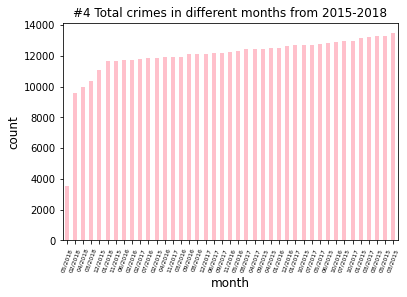

In [0]:
##4 Visulize the result
df_month_res_pd_df = df_month_res.toPandas()
plt.figure()
ax = df_month_res_pd_df.plot(kind ='bar',x='Month',y='count',color = 'pink',legend = False)
ax.set_ylabel('count',fontsize = 12)
ax.set_xlabel('month',fontsize = 12)
plt.xticks(fontsize=6, rotation=70)
plt.title('#4 Total crimes in different months from 2015-2018')
display()

Q4_Business Impact:
It is very obvious from the above figure that the crime rate from 2015 to 2017 is very high, especially the theft crime, and there has been a downward trend in 2018, especially in May.
The crime rate has been so high since 2015, it may be because of the 47th Act signed by the governor in the California referendum in 2014, which led to a large number of theft and robbery crimes.
Through online research, the reason for the decline in crime rate since 2018 may be that the San Francisco Police Department has increased uniformed police patrols, hence violence and theft activities have been greatly reduced. In addition, the San Francisco Police Department stepped up its crackdown on the drug trade, which is also one of the reasons for the decline in crime rate.

#### Q5 question (OLAP)
Analysis the number of crime with respsect to the hour in certian day like 2015/12/15, 2016/12/15, 2017/12/15. Then, give your travel suggestion to visit SF.

method1

In [0]:

# Show number of crime by hour for all records
q5_result = spark.sql("""
                      select substring(Time,1,2) as Hour,
                      count(*) as Count
                      from sf_crime
                      group by Hour
                      order by Hour
                      """)
display(q5_result)

Hour Count 00 108935 01 63344 02 52910 03 34580 04 24530 05 21769 06 32422 07 52359 08 78337 09 85640 10 91637 11 93552 12 127555 13 104097 14 107483 15 114582 16 120340 17 130152 18 135745 19 121905 20 110674 21 105539 22 110011 23 101427

In [0]:
# Show number of crime by hour for records in Christmas
q5_result = spark.sql("""
                      select substring(Time,1,2) as Hour,
                      count(*) as Count
                      from sf_crime
                      where Date like '12/25/%'
                      group by Hour
                      order by Hour
                      """)
display(q5_result)

Hour Count 00 208 01 133 02 106 03 78 04 59 05 49 06 54 07 62 08 110 09 82 10 135 11 138 12 220 13 137 14 131 15 167 16 159 17 146 18 169 19 164 20 150 21 174 22 175 23 196

In [0]:
# Show number of crime by hour for records in New Year Eve (12/31 - 01/01)
q5_result = spark.sql("""
                      select substring(Time,1,2) as Hour,
                             substring(Date,1,5) as Date_in_year,
                             count(*) as Count
                      from sf_crime
                      where Date like '12/31/%' or Date like '01/01/%'
                      group by Date_in_year, Hour
                      order by Date_in_year desc, Hour
                      """)
display(q5_result)

Hour Date_in_year Count 00 12/31 277 01 12/31 160 02 12/31 137 03 12/31 70 04 12/31 55 05 12/31 59 06 12/31 72 07 12/31 98 08 12/31 177 09 12/31 171 10 12/31 208 11 12/31 278 12 12/31 333 13 12/31 228 14 12/31 256 15 12/31 257 16 12/31 300 17 12/31 301 18 12/31 291 19 12/31 288 20 12/31 270 21 12/31 355 22 12/31 415 23 12/31 555 00 01/01 1868 01 01/01 615 02 01/01 518 03 01/01 246 04 01/01 157 05 01/01 99 06 01/01 99 07 01/01 158 08 01/01 288 09 01/01 312 10 01/01 254 11 01/01 179 12 01/01 673 13 01/01 282 14 01/01 261 15 01/01 278 16 01/01 297 17 01/01 300 18 01/01 269 19 01/01 283 20 01/01 247 21 01/01 238 22 01/01 291 23 01/01 237

method2

In [0]:
from pyspark.sql.functions import to_timestamp
# to_timestamp function provided by pyspark
# purpose is to generate a new column with its defined logic

# sometimes functions provided by pyspark might not satify our usage
# then we want to define our own function, and apply the same way as functions provided by pyspark

# add new columns to convert Time to hour format
df_new1 = df_new.withColumn('IncidentTime', to_timestamp(df_new['Time'],'HH:mm')) 
# extract hour from incident time
df_new1 = df_new1.withColumn('Hour',hour(df_new1['IncidentTime']))
display(df_new1.take(5))

IncidntNum Category Descript DayOfWeek Date Time PdDistrict Resolution Address X Y Location IncidentDate Month Year IncidentTime Hour 041334220 ROBBERY ROBBERY, BODILY FORCE Monday 11/22/2004 17:50 INGLESIDE NONE GENEVA AV / SANTOS ST -122.420084075249 37.7083109744362 POINT (-122.420084075249 37.7083109744362) 2004-11-22 11 2004 1970-01-01T17:50:00.000+0000 17 051185358 VEHICLE THEFT STOLEN AUTOMOBILE Tuesday 10/18/2005 20:00 PARK NONE TURK ST / STJOSEPHS AV -120.5 90 POINT (-120.50000000000001 90) 2005-10-18 10 2005 1970-01-01T20:00:00.000+0000 20 040188309 VEHICLE THEFT STOLEN AUTOMOBILE Sunday 02/15/2004 02:00 SOUTHERN NONE BRANNAN ST / 1ST ST -120.5 90 POINT (-120.50000000000001 90) 2004-02-15 2 2004 1970-01-01T02:00:00.000+0000 2 110145431 ARSON ARSON Friday 02/18/2011 05:27 INGLESIDE NONE 0 Block of SANJUAN AV -122.43622001281 37.7243766140428 POINT (-122.43622001281001 37.7243766140428) 2011-02-18 2 2011 1970-01-01T05:27:00.000+0000 5 101081080 ASSAULT BATTERY Sunday 11/21/2010 17:00 SOUTHERN NONE 400 Block of 10TH ST -122.410541166987 37.7709130566165 POINT (-122.410541166987 37.7709130566165) 2010-11-21 11 2010 1970-01-01T17:00:00.000+0000 17

In [0]:
dates = ['12/15/2015','12/15/2016','12/15/2017']
df_days = df_new1[df_new1.Date.isin(dates)]
spark_df_q5_1 = df_days.groupby('Hour','Date').count().orderBy('Date','Hour')
display(spark_df_q5_1)

Hour Date count 0 12/15/2015 15 1 12/15/2015 6 2 12/15/2015 5 3 12/15/2015 4 4 12/15/2015 10 5 12/15/2015 3 6 12/15/2015 4 7 12/15/2015 8 8 12/15/2015 12 9 12/15/2015 10 10 12/15/2015 25 11 12/15/2015 15 12 12/15/2015 35 13 12/15/2015 13 14 12/15/2015 27 15 12/15/2015 14 16 12/15/2015 30 17 12/15/2015 18 18 12/15/2015 17 19 12/15/2015 26 20 12/15/2015 13 21 12/15/2015 13 22 12/15/2015 13 23 12/15/2015 10 0 12/15/2016 21 1 12/15/2016 9 2 12/15/2016 12 3 12/15/2016 9 4 12/15/2016 1 5 12/15/2016 6 6 12/15/2016 3 7 12/15/2016 3 8 12/15/2016 21 9 12/15/2016 23 10 12/15/2016 12 11 12/15/2016 17 12 12/15/2016 29 13 12/15/2016 17 14 12/15/2016 19 15 12/15/2016 13 16 12/15/2016 17 17 12/15/2016 19 18 12/15/2016 38 19 12/15/2016 30 20 12/15/2016 25 21 12/15/2016 15 22 12/15/2016 22 23 12/15/2016 15 0 12/15/2017 30 1 12/15/2017 12 2 12/15/2017 6 3 12/15/2017 4 4 12/15/2017 9 5 12/15/2017 2 6 12/15/2017 6 7 12/15/2017 11 8 12/15/2017 26 9 12/15/2017 14 10 12/15/2017 27 11 12/15/2017 26 12 12/15/2017 23 13 12/15/2017 10 14 12/15/2017 11 15 12/15/2017 26 16 12/15/2017 30 17 12/15/2017 27 18 12/15/2017 28 19 12/15/2017 29 20 12/15/2017 17 21 12/15/2017 20 22 12/15/2017 36 23 12/15/2017 28

method3

In [0]:
##5 Define 1 udf
def time_to_hour(x):
  return x.split(':')[0]
# given a string HH:MM representing time, return a string representing hour of the given time

tth_udf = udf(lambda x: time_to_hour(x))
# tth_udf is now like to_timestamp, or hour

##5 groupby hour
df_opt4 = df_opt1.withColumn('Hour',tth_udf('Time')) # add a new column with hour extracted from time
df_hour_res = df_opt4.filter(df_opt4.Date =='12/15/2017').groupBy('Hour').count().orderBy('count')
display(df_hour_res)

Hour count 05 2 03 4 02 6 06 6 04 9 13 10 14 11 07 11 01 12 09 14 20 17 21 20 12 23 11 26 15 26 08 26 10 27 17 27 18 28 23 28 19 29 00 30 16 30 22 36

<Figure size 432x288 with 0 Axes>

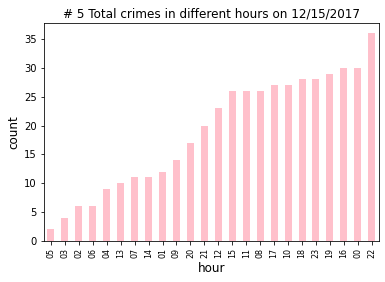

In [0]:
##5 Visulize the result
df_hour_res_pd_df = df_hour_res.toPandas()
plt.figure()
ax = df_hour_res_pd_df.plot(kind ='bar',x='Hour',y='count',color = 'pink',legend = False)
ax.set_ylabel('count',fontsize = 12)
ax.set_xlabel('hour',fontsize = 12)
plt.xticks(fontsize=8, rotation=90)
plt.title('# 5 Total crimes in different hours on 12/15/2017')
display()

#### Q6 question (OLAP)
(1) Step1: Find out the top-3 danger disrict  
(2) Step2: find out the crime event w.r.t category and time (hour) from the result of step 1  
(3) give your advice to distribute the police based on your analysis results.

In [0]:
#df way
spark_df_q6_s1 = df_new.groupby('PdDistrict').count().orderBy('count',ascending = False)
display(spark_df_q6_s1)

PdDistrict count SOUTHERN 390692 MISSION 288985 NORTHERN 266435 CENTRAL 221923 BAYVIEW 205480 TENDERLOIN 186954 INGLESIDE 181092 TARAVAL 155461 PARK 119698 RICHMOND 112804 NA 1

In [0]:
top3_danger = df_new.groupby('PdDistrict').count().orderBy('count',ascending = False).head(3)
top3_danger_district = [top3_danger[i][0] for i in range(3)]
top3_danger_district

Out[40]: ['SOUTHERN', 'MISSION', 'NORTHERN']

In [0]:
#sql way
spark_sql_q6_s1 = spark.sql( """
                             SELECT PdDistrict, COUNT(*) as Count
                             FROM sf_crime
                             GROUP BY 1
                             ORDER BY 2 DESC
                             LIMIT 3 
                             """ )
display(spark_sql_q6_s1)

PdDistrict Count SOUTHERN 390692 MISSION 288985 NORTHERN 266435

Step2: Find out the crime event w.r.t category and time (hour) from the result of step 1

In [0]:
# df way
spark_df_q6_s2 = df_new1.filter(df_new1.PdDistrict.isin('SOUTHERN', 'MISSION', 'NORTHERN')).groupby('Category','Hour').count().orderBy('Category','Hour')
display(spark_df_q6_s2)

Category Hour count ARSON 0 84 ARSON 1 77 ARSON 2 84 ARSON 3 95 ARSON 4 74 ARSON 5 60 ARSON 6 50 ARSON 7 28 ARSON 8 34 ARSON 9 28 ARSON 10 44 ARSON 11 29 ARSON 12 37 ARSON 13 35 ARSON 14 36 ARSON 15 49 ARSON 16 31 ARSON 17 48 ARSON 18 53 ARSON 19 59 ARSON 20 69 ARSON 21 55 ARSON 22 61 ARSON 23 72 ASSAULT 0 4120 ASSAULT 1 3940 ASSAULT 2 3510 ASSAULT 3 1622 ASSAULT 4 1017 ASSAULT 5 772 ASSAULT 6 1089 ASSAULT 7 1581 ASSAULT 8 2325 ASSAULT 9 2629 ASSAULT 10 2860 ASSAULT 11 3076 ASSAULT 12 3735 ASSAULT 13 3407 ASSAULT 14 3529 ASSAULT 15 3862 ASSAULT 16 3876 ASSAULT 17 3826 ASSAULT 18 3726 ASSAULT 19 3591 ASSAULT 20 3498 ASSAULT 21 3609 ASSAULT 22 3623 ASSAULT 23 3480 BAD CHECKS 0 79 BAD CHECKS 1 3 BAD CHECKS 2 2 BAD CHECKS 4 2 BAD CHECKS 5 1 BAD CHECKS 6 2 BAD CHECKS 7 3 BAD CHECKS 8 24 BAD CHECKS 9 26 BAD CHECKS 10 24 BAD CHECKS 11 15 BAD CHECKS 12 76 BAD CHECKS 13 15 BAD CHECKS 14 21 BAD CHECKS 15 31 BAD CHECKS 16 19 BAD CHECKS 17 25 BAD CHECKS 18 10 BAD CHECKS 19 11 BAD CHECKS 20 8 BAD CHECKS 21 4 BAD CHECKS 22 2 BAD CHECKS 23 3 BRIBERY 0 20 BRIBERY 1 11 BRIBERY 2 12 BRIBERY 3 6 BRIBERY 4 5 BRIBERY 5 2 BRIBERY 6 2 BRIBERY 7 4 BRIBERY 8 6 BRIBERY 9 11 BRIBERY 10 18 BRIBERY 11 17 BRIBERY 12 17 BRIBERY 13 11 BRIBERY 14 14 BRIBERY 15 10 BRIBERY 16 14 BRIBERY 17 25 BRIBERY 18 13 BRIBERY 19 17 BRIBERY 20 16 BRIBERY 21 20 BRIBERY 22 20 BRIBERY 23 15 BURGLARY 0 1585 BURGLARY 1 1064 BURGLARY 2 1152 BURGLARY 3 1229 BURGLARY 4 1032 BURGLARY 5 948 BURGLARY 6 858 BURGLARY 7 998 BURGLARY 8 1669 BURGLARY 9 1379 BURGLARY 10 1220 BURGLARY 11 1193 BURGLARY 12 1775 BURGLARY 13 1157 BURGLARY 14 1391 BURGLARY 15 1635 BURGLARY 16 1893 BURGLARY 17 2613 BURGLARY 18 2654 BURGLARY 19 2102 BURGLARY 20 1843 BURGLARY 21 1680 BURGLARY 22 1727 BURGLARY 23 1567 DISORDERLY CONDUCT 0 301 DISORDERLY CONDUCT 1 225 DISORDERLY CONDUCT 2 212 DISORDERLY CONDUCT 3 140 DISORDERLY CONDUCT 4 100 DISORDERLY CONDUCT 5 163 DISORDERLY CONDUCT 6 396 DISORDERLY CONDUCT 7 451 DISORDERLY CONDUCT 8 362 DISORDERLY CONDUCT 9 311 DISORDERLY CONDUCT 10 244 DISORDERLY CONDUCT 11 200 DISORDERLY CONDUCT 12 177 DISORDERLY CONDUCT 13 172 DISORDERLY CONDUCT 14 165 DISORDERLY CONDUCT 15 117 DISORDERLY CONDUCT 16 142 DISORDERLY CONDUCT 17 128 DISORDERLY CONDUCT 18 158 DISORDERLY CONDUCT 19 131 DISORDERLY CONDUCT 20 129 DISORDERLY CONDUCT 21 146 DISORDERLY CONDUCT 22 208 DISORDERLY CONDUCT 23 260 DRIVING UNDER THE INFLUENCE 0 272 DRIVING UNDER THE INFLUENCE 1 274 DRIVING UNDER THE INFLUENCE 2 263 DRIVING UNDER THE INFLUENCE 3 117 DRIVING UNDER THE INFLUENCE 4 40 DRIVING UNDER THE INFLUENCE 5 27 DRIVING UNDER THE INFLUENCE 6 27 DRIVING UNDER THE INFLUENCE 7 19 DRIVING UNDER THE INFLUENCE 8 18 DRIVING UNDER THE INFLUENCE 9 25 DRIVING UNDER THE INFLUENCE 10 11 DRIVING UNDER THE INFLUENCE 11 23 DRIVING UNDER THE INFLUENCE 12 33 DRIVING UNDER THE INFLUENCE 13 20 DRIVING UNDER THE INFLUENCE 14 27 DRIVING UNDER THE INFLUENCE 15 48 DRIVING UNDER THE INFLUENCE 16 62 DRIVING UNDER THE INFLUENCE 17 66 DRIVING UNDER THE INFLUENCE 18 81 DRIVING UNDER THE INFLUENCE 19 92 DRIVING UNDER THE INFLUENCE 20 119 DRIVING UNDER THE INFLUENCE 21 167 DRIVING UNDER THE INFLUENCE 22 194 DRIVING UNDER THE INFLUENCE 23 239 DRUG/NARCOTIC 0 1756 DRUG/NARCOTIC 1 1156 DRUG/NARCOTIC 2 947 DRUG/NARCOTIC 3 607 DRUG/NARCOTIC 4 444 DRUG/NARCOTIC 5 216 DRUG/NARCOTIC 6 678 DRUG/NARCOTIC 7 1439 DRUG/NARCOTIC 8 1845 DRUG/NARCOTIC 9 2178 DRUG/NARCOTIC 10 2403 DRUG/NARCOTIC 11 2578 DRUG/NARCOTIC 12 2582 DRUG/NARCOTIC 13 3131 DRUG/NARCOTIC 14 3435 DRUG/NARCOTIC 15 3177 DRUG/NARCOTIC 16 3275 DRUG/NARCOTIC 17 3588 DRUG/NARCOTIC 18 3269 DRUG/NARCOTIC 19 2921 DRUG/NARCOTIC 20 2157 DRUG/NARCOTIC 21 1937 DRUG/NARCOTIC 22 2380 DRUG/NARCOTIC 23 2178 DRUNKENNESS 0 400 DRUNKENNESS 1 369 DRUNKENNESS 2 294 DRUNKENNESS 3 128 DRUNKENNESS 4 55 DRUNKENNESS 5 20 DRUNKENNESS 6 31 DRUNKENNESS 7 79 DRUNKENNESS 8 78 DRUNKENNESS 9 98 DRUNKENNESS 10 100 DRUNKENNESS 11 145 DRUNKENNESS 12 119 DRUNKENNESS 13 146 DRUNKENNESS 14 129 DRUNKENNESS 15 160 DRUNKENNESS 1

###Q6_Advice
* According to step1, the three most dangerous districts are SOUTHERN, MISSION and NORTHERN.
* We can see from the picture above that among the top three dangerous streets, the crime rate around 5 am is the lowest, and the high incidence of crime rate is around 12pm and 18pm, especially pay attention to theft, so I recommend to increase police patrol during that periods.

#### Q7 question (OLAP)
For different category of crime, find the percentage of resolution. Based on the output, give your hints to adjust the policy.

method1

In [0]:
res_num = spark.sql("""select category, resolution, count(*) as N_res from sf_crime group by category, resolution""")
res_num.createOrReplaceTempView("res_num")

cate_num = spark.sql("""select category, count(*) as N_cate from sf_crime group by category""")
cate_num.createOrReplaceTempView("cate_num")

q7_result = spark.sql("""
                      select distinct sf_crime.category, sf_crime.resolution, N_res/N_cate as Percentage
                      from (sf_crime left join res_num on sf_crime.category = res_num.category and sf_crime.resolution = res_num.resolution)
                      left join cate_num on sf_crime.category = cate_num.category
                      order by category, resolution""")
q7_result.createOrReplaceTempView("q7_result")

In [0]:
display(q7_result)

category resolution Percentage ARSON ARREST, BOOKED 0.1625806451612903 ARSON ARREST, CITED 0.004387096774193549 ARSON COMPLAINANT REFUSES TO PROSECUTE 7.741935483870968E-4 ARSON EXCEPTIONAL CLEARANCE 5.161290322580645E-4 ARSON NONE 0.8190967741935484 ARSON NOT PROSECUTED 7.741935483870968E-4 ARSON PROSECUTED BY OUTSIDE AGENCY 7.741935483870968E-4 ARSON PROSECUTED FOR LESSER OFFENSE 2.5806451612903227E-4 ARSON PSYCHOPATHIC CASE 0.004387096774193549 ARSON UNFOUNDED 0.0064516129032258064 ASSAULT ARREST, BOOKED 0.29481208318865915 ASSAULT ARREST, CITED 0.04206726452030028 ASSAULT COMPLAINANT REFUSES TO PROSECUTE 0.010757773494091306 ASSAULT DISTRICT ATTORNEY REFUSES TO PROSECUTE 0.012278349157696867 ASSAULT EXCEPTIONAL CLEARANCE 0.0037834796039319454 ASSAULT LOCATED 5.567462075406185E-4 ASSAULT NONE 0.6258485889776224 ASSAULT NOT PROSECUTED 8.141664970486464E-4 ASSAULT PROSECUTED BY OUTSIDE AGENCY 6.106248727864848E-4 ASSAULT PROSECUTED FOR LESSER OFFENSE 7.183822032782174E-5 ASSAULT PSYCHOPATHIC CASE 0.0024125668993426803 ASSAULT UNFOUNDED 0.005986518360651812 BAD CHECKS ARREST, BOOKED 0.05303030303030303 BAD CHECKS ARREST, CITED 0.0010822510822510823 BAD CHECKS COMPLAINANT REFUSES TO PROSECUTE 0.005411255411255411 BAD CHECKS DISTRICT ATTORNEY REFUSES TO PROSECUTE 0.015151515151515152 BAD CHECKS EXCEPTIONAL CLEARANCE 0.006493506493506494 BAD CHECKS NONE 0.8051948051948052 BAD CHECKS NOT PROSECUTED 0.048701298701298704 BAD CHECKS PROSECUTED BY OUTSIDE AGENCY 0.05194805194805195 BAD CHECKS UNFOUNDED 0.012987012987012988 BRIBERY ARREST, BOOKED 0.5251256281407035 BRIBERY ARREST, CITED 0.00628140703517588 BRIBERY COMPLAINANT REFUSES TO PROSECUTE 0.013819095477386936 BRIBERY DISTRICT ATTORNEY REFUSES TO PROSECUTE 0.018844221105527637 BRIBERY EXCEPTIONAL CLEARANCE 0.0037688442211055275 BRIBERY NONE 0.42462311557788945 BRIBERY NOT PROSECUTED 0.001256281407035176 BRIBERY UNFOUNDED 0.00628140703517588 BURGLARY ARREST, BOOKED 0.14017152206617106 BURGLARY ARREST, CITED 0.0016032152151712476 BURGLARY COMPLAINANT REFUSES TO PROSECUTE 0.0032723159871303545 BURGLARY DISTRICT ATTORNEY REFUSES TO PROSECUTE 0.004535122492230995 BURGLARY EXCEPTIONAL CLEARANCE 0.0014714441015955286 BURGLARY LOCATED 1.6471389196964873E-4 BURGLARY NONE 0.8417209307432989 BURGLARY NOT PROSECUTED 6.039509372220453E-4 BURGLARY PROSECUTED BY OUTSIDE AGENCY 3.513896362019173E-4 BURGLARY PROSECUTED FOR LESSER OFFENSE 2.196185226261983E-5 BURGLARY PSYCHOPATHIC CASE 9.882833518178923E-5 BURGLARY UNFOUNDED 0.005984604741563903 DISORDERLY CONDUCT ARREST, BOOKED 0.37273459524768426 DISORDERLY CONDUCT ARREST, CITED 0.26449859041482077 DISORDERLY CONDUCT COMPLAINANT REFUSES TO PROSECUTE 0.002819170358437374 DISORDERLY CONDUCT DISTRICT ATTORNEY REFUSES TO PROSECUTE 9.061619009262988E-4 DISORDERLY CONDUCT EXCEPTIONAL CLEARANCE 0.0010068465565847766 DISORDERLY CONDUCT LOCATED 6.041079339508659E-4 DISORDERLY CONDUCT NONE 0.3481675392670157 DISORDERLY CONDUCT NOT PROSECUTED 0.0011075312122432541 DISORDERLY CONDUCT PROSECUTED BY OUTSIDE AGENCY 2.013693113169553E-4 DISORDERLY CONDUCT PROSECUTED FOR LESSER OFFENSE 1.0068465565847765E-4 DISORDERLY CONDUCT PSYCHOPATHIC CASE 0.0018123238018525976 DISORDERLY CONDUCT UNFOUNDED 0.006041079339508659 DRIVING UNDER THE INFLUENCE ARREST, BOOKED 0.8742038216560509 DRIVING UNDER THE INFLUENCE ARREST, CITED 0.06723283793347487 DRIVING UNDER THE INFLUENCE EXCEPTIONAL CLEARANCE 5.307855626326964E-4 DRIVING UNDER THE INFLUENCE LOCATED 3.5385704175513094E-4 DRIVING UNDER THE INFLUENCE NONE 0.05608634111818825 DRIVING UNDER THE INFLUENCE PROSECUTED BY OUTSIDE AGENCY 1.7692852087756547E-4 DRIVING UNDER THE INFLUENCE PROSECUTED FOR LESSER OFFENSE 1.7692852087756547E-4 DRIVING UNDER THE INFLUENCE PSYCHOPATHIC CASE 1.7692852087756547E-4 DRIVING UNDER THE INFLUENCE UNFOUNDED 0.0010615711252653928 DRUG/NARCOTIC ARREST, BOOKED 0.8311421563218782 DRUG/NARCOTIC ARREST, CITED 0.07677748448918274 DRUG/NARCOTIC COMPLAINANT REFUSES TO PROSECUTE 4.1588511385915925E-4 DRU

In [0]:
q7_result_2 = spark.sql("""
                      select distinct res_num.category, res_num.resolution, N_res/N_cate as Percentage
                      from res_num left join cate_num on res_num.category = cate_num.category
                      order by category, resolution""")
display(q7_result_2)

category resolution Percentage ARSON ARREST, BOOKED 0.1625806451612903 ARSON ARREST, CITED 0.004387096774193549 ARSON COMPLAINANT REFUSES TO PROSECUTE 7.741935483870968E-4 ARSON EXCEPTIONAL CLEARANCE 5.161290322580645E-4 ARSON NONE 0.8190967741935484 ARSON NOT PROSECUTED 7.741935483870968E-4 ARSON PROSECUTED BY OUTSIDE AGENCY 7.741935483870968E-4 ARSON PROSECUTED FOR LESSER OFFENSE 2.5806451612903227E-4 ARSON PSYCHOPATHIC CASE 0.004387096774193549 ARSON UNFOUNDED 0.0064516129032258064 ASSAULT ARREST, BOOKED 0.29481208318865915 ASSAULT ARREST, CITED 0.04206726452030028 ASSAULT COMPLAINANT REFUSES TO PROSECUTE 0.010757773494091306 ASSAULT DISTRICT ATTORNEY REFUSES TO PROSECUTE 0.012278349157696867 ASSAULT EXCEPTIONAL CLEARANCE 0.0037834796039319454 ASSAULT LOCATED 5.567462075406185E-4 ASSAULT NONE 0.6258485889776224 ASSAULT NOT PROSECUTED 8.141664970486464E-4 ASSAULT PROSECUTED BY OUTSIDE AGENCY 6.106248727864848E-4 ASSAULT PROSECUTED FOR LESSER OFFENSE 7.183822032782174E-5 ASSAULT PSYCHOPATHIC CASE 0.0024125668993426803 ASSAULT UNFOUNDED 0.005986518360651812 BAD CHECKS ARREST, BOOKED 0.05303030303030303 BAD CHECKS ARREST, CITED 0.0010822510822510823 BAD CHECKS COMPLAINANT REFUSES TO PROSECUTE 0.005411255411255411 BAD CHECKS DISTRICT ATTORNEY REFUSES TO PROSECUTE 0.015151515151515152 BAD CHECKS EXCEPTIONAL CLEARANCE 0.006493506493506494 BAD CHECKS NONE 0.8051948051948052 BAD CHECKS NOT PROSECUTED 0.048701298701298704 BAD CHECKS PROSECUTED BY OUTSIDE AGENCY 0.05194805194805195 BAD CHECKS UNFOUNDED 0.012987012987012988 BRIBERY ARREST, BOOKED 0.5251256281407035 BRIBERY ARREST, CITED 0.00628140703517588 BRIBERY COMPLAINANT REFUSES TO PROSECUTE 0.013819095477386936 BRIBERY DISTRICT ATTORNEY REFUSES TO PROSECUTE 0.018844221105527637 BRIBERY EXCEPTIONAL CLEARANCE 0.0037688442211055275 BRIBERY NONE 0.42462311557788945 BRIBERY NOT PROSECUTED 0.001256281407035176 BRIBERY UNFOUNDED 0.00628140703517588 BURGLARY ARREST, BOOKED 0.14017152206617106 BURGLARY ARREST, CITED 0.0016032152151712476 BURGLARY COMPLAINANT REFUSES TO PROSECUTE 0.0032723159871303545 BURGLARY DISTRICT ATTORNEY REFUSES TO PROSECUTE 0.004535122492230995 BURGLARY EXCEPTIONAL CLEARANCE 0.0014714441015955286 BURGLARY LOCATED 1.6471389196964873E-4 BURGLARY NONE 0.8417209307432989 BURGLARY NOT PROSECUTED 6.039509372220453E-4 BURGLARY PROSECUTED BY OUTSIDE AGENCY 3.513896362019173E-4 BURGLARY PROSECUTED FOR LESSER OFFENSE 2.196185226261983E-5 BURGLARY PSYCHOPATHIC CASE 9.882833518178923E-5 BURGLARY UNFOUNDED 0.005984604741563903 DISORDERLY CONDUCT ARREST, BOOKED 0.37273459524768426 DISORDERLY CONDUCT ARREST, CITED 0.26449859041482077 DISORDERLY CONDUCT COMPLAINANT REFUSES TO PROSECUTE 0.002819170358437374 DISORDERLY CONDUCT DISTRICT ATTORNEY REFUSES TO PROSECUTE 9.061619009262988E-4 DISORDERLY CONDUCT EXCEPTIONAL CLEARANCE 0.0010068465565847766 DISORDERLY CONDUCT LOCATED 6.041079339508659E-4 DISORDERLY CONDUCT NONE 0.3481675392670157 DISORDERLY CONDUCT NOT PROSECUTED 0.0011075312122432541 DISORDERLY CONDUCT PROSECUTED BY OUTSIDE AGENCY 2.013693113169553E-4 DISORDERLY CONDUCT PROSECUTED FOR LESSER OFFENSE 1.0068465565847765E-4 DISORDERLY CONDUCT PSYCHOPATHIC CASE 0.0018123238018525976 DISORDERLY CONDUCT UNFOUNDED 0.006041079339508659 DRIVING UNDER THE INFLUENCE ARREST, BOOKED 0.8742038216560509 DRIVING UNDER THE INFLUENCE ARREST, CITED 0.06723283793347487 DRIVING UNDER THE INFLUENCE EXCEPTIONAL CLEARANCE 5.307855626326964E-4 DRIVING UNDER THE INFLUENCE LOCATED 3.5385704175513094E-4 DRIVING UNDER THE INFLUENCE NONE 0.05608634111818825 DRIVING UNDER THE INFLUENCE PROSECUTED BY OUTSIDE AGENCY 1.7692852087756547E-4 DRIVING UNDER THE INFLUENCE PROSECUTED FOR LESSER OFFENSE 1.7692852087756547E-4 DRIVING UNDER THE INFLUENCE PSYCHOPATHIC CASE 1.7692852087756547E-4 DRIVING UNDER THE INFLUENCE UNFOUNDED 0.0010615711252653928 DRUG/NARCOTIC ARREST, BOOKED 0.8311421563218782 DRUG/NARCOTIC ARREST, CITED 0.07677748448918274 DRUG/NARCOTIC COMPLAINANT REFUSES TO PROSECUTE 4.1588511385915925E-4 DRU

In [0]:
# Percentage of resolution for LARCENY/THEFT
q7 = spark.sql("""
               select Resolution, Percentage
               from q7_result
               where category = 'LARCENY/THEFT'
               order by Percentage desc
               """)
display(q7)

Resolution Percentage NONE 0.9162131910664784 ARREST, BOOKED 0.052588524504419684 ARREST, CITED 0.021890266227313143 NOT PROSECUTED 0.0033474554108478475 UNFOUNDED 0.0025545269104032637 COMPLAINANT REFUSES TO PROSECUTE 9.854071865683352E-4 DISTRICT ATTORNEY REFUSES TO PROSECUTE 9.770385480412154E-4 EXCEPTIONAL CLEARANCE 9.247345572467179E-4 PROSECUTED BY OUTSIDE AGENCY 3.2637690255766513E-4 PSYCHOPATHIC CASE 9.833150269365553E-5 LOCATED 9.205502379831582E-5 PROSECUTED FOR LESSER OFFENSE 2.092159631779905E-6

In [0]:
# Percentage of resolution for BURGLARY
q7 = spark.sql("""
               select Resolution, Percentage
               from q7_result
               where category = 'BURGLARY'
               order by Percentage desc
               """)
display(q7)

Resolution Percentage NONE 0.8417209307432989 ARREST, BOOKED 0.14017152206617106 UNFOUNDED 0.005984604741563903 DISTRICT ATTORNEY REFUSES TO PROSECUTE 0.004535122492230995 COMPLAINANT REFUSES TO PROSECUTE 0.0032723159871303545 ARREST, CITED 0.0016032152151712476 EXCEPTIONAL CLEARANCE 0.0014714441015955286 NOT PROSECUTED 6.039509372220453E-4 PROSECUTED BY OUTSIDE AGENCY 3.513896362019173E-4 LOCATED 1.6471389196964873E-4 PSYCHOPATHIC CASE 9.882833518178923E-5 PROSECUTED FOR LESSER OFFENSE 2.196185226261983E-5

In [0]:
# Percentage of resolution for ASSAULT
q7 = spark.sql("""
               select Resolution, Percentage
               from q7_result
               where category = 'ASSAULT'
               order by Percentage desc
               """)
display(q7)

Resolution Percentage NONE 0.6258485889776224 ARREST, BOOKED 0.29481208318865915 ARREST, CITED 0.04206726452030028 DISTRICT ATTORNEY REFUSES TO PROSECUTE 0.012278349157696867 COMPLAINANT REFUSES TO PROSECUTE 0.010757773494091306 UNFOUNDED 0.005986518360651812 EXCEPTIONAL CLEARANCE 0.0037834796039319454 PSYCHOPATHIC CASE 0.0024125668993426803 NOT PROSECUTED 8.141664970486464E-4 PROSECUTED BY OUTSIDE AGENCY 6.106248727864848E-4 LOCATED 5.567462075406185E-4 PROSECUTED FOR LESSER OFFENSE 7.183822032782174E-5

Q7 Answer
The percentage of resolution for LARCENY/THEFT, BURGLATY and ASSAULT are shown above.
Surprisingly, it shows that most crime cases are not resolved (with 'NONE' in resolution).

method2

In [0]:
%sql select distinct(resolution) as resolve from sf_crime

resolve EXCEPTIONAL CLEARANCE ARREST, BOOKED PROSECUTED FOR LESSER OFFENSE LOCATED UNFOUNDED DISTRICT ATTORNEY REFUSES TO PROSECUTE PSYCHOPATHIC CASE COMPLAINANT REFUSES TO PROSECUTE ARREST, CITED PROSECUTED BY OUTSIDE AGENCY NONE NOT PROSECUTED

In [0]:
import pyspark.sql.functions as f
from pyspark.sql.window import Window
# define udf
resolution_func = udf (lambda x: x != 'NONE')
# apply udf, generate new column with processed information
spark_df_q7 = df_new.withColumn('IsResolution', resolution_func(f.col('Resolution')))
# category, Resolution, IsResolution

spark_df_q7 = spark_df_q7.groupBy('category', 'Resolution', 'IsResolution').count().withColumnRenamed('count', 'resolved').orderBy('category')
# category, Resolution, IsResolution, resolved

spark_df_q7 = spark_df_q7.withColumn('total', f.sum('resolved').over(Window.partitionBy('category')))\
# category, Resolution, IsResolution, resolved, total
# Q: 
# here when we calculate the total, we consider all Resolution types (including 'NONE')
# can we exclude the "NONE" resolution type and calculate the percentage

             .withColumn('percentage%', f.col('resolved')*100/f.col('total'))\
# category, Resolution, IsResolution, resolved, total, percentage%
             .filter(spark_df_q7.IsResolution == True).orderBy('percentage%', ascending=False)
# category, Resolution, IsResolution, resolved, total, percentage%

display(spark_df_q7)

category Resolution IsResolution resolved total percentage% WARRANTS ARREST, BOOKED true 93092 99821 93.25893349094879 DRIVING UNDER THE INFLUENCE ARREST, BOOKED true 4941 5652 87.42038216560509 STOLEN PROPERTY ARREST, BOOKED true 9693 11450 84.65502183406113 DRUG/NARCOTIC ARREST, BOOKED true 97926 117821 83.11421563218781 DRUNKENNESS ARREST, BOOKED true 7471 9760 76.54713114754098 LIQUOR LAWS ARREST, BOOKED true 1839 2840 64.75352112676056 WEAPON LAWS ARREST, BOOKED true 13334 21004 63.48314606741573 LOITERING ARREST, CITED true 1432 2402 59.61698584512906 PROSTITUTION ARREST, CITED true 9667 16501 58.584328222531965 BRIBERY ARREST, BOOKED true 418 796 52.51256281407035 KIDNAPPING ARREST, BOOKED true 2165 4282 50.56048575432041 MISSING PERSON LOCATED true 19615 44268 44.30965934761001 TREA ARREST, BOOKED true 6 14 42.857142857142854 TRESPASS ARREST, BOOKED true 7598 19194 39.585287068875694 OTHER OFFENSES ARREST, BOOKED true 115427 301874 38.23681403499473 DISORDERLY CONDUCT ARREST, BOOKED true 3702 9932 37.27345952476843 PROSTITUTION ARREST, BOOKED true 5780 16501 35.02818011029635 SECONDARY CODES ARREST, BOOKED true 7811 22378 34.90481723120922 GAMBLING ARREST, BOOKED true 118 343 34.40233236151604 OTHER OFFENSES ARREST, CITED true 94817 301874 31.409462225961825 ASSAULT ARREST, BOOKED true 49246 167042 29.481208318865914 LOITERING ARREST, BOOKED true 658 2402 27.39383846794338 DISORDERLY CONDUCT ARREST, CITED true 2627 9932 26.44985904148208 TRESPASS ARREST, CITED true 5053 19194 26.325935188079608 PORNOGRAPHY/OBSCENE MAT ARREST, BOOKED true 15 57 26.31578947368421 GAMBLING ARREST, CITED true 83 343 24.198250728862973 LIQUOR LAWS ARREST, CITED true 652 2840 22.95774647887324 FORGERY/COUNTERFEITING ARREST, BOOKED true 4339 22995 18.869319417264624 SEX OFFENSES, FORCIBLE ARREST, BOOKED true 1648 8747 18.840745398422317 SUICIDE PSYCHOPATHIC CASE true 235 1291 18.202943454686288 ROBBERY ARREST, BOOKED true 9598 54467 17.621679181889952 SEX OFFENSES, NON FORCIBLE DISTRICT ATTORNEY REFUSES TO PROSECUTE true 7 43 16.27906976744186 ARSON ARREST, BOOKED true 630 3875 16.258064516129032 EMBEZZLEMENT ARREST, BOOKED true 453 2984 15.180965147453083 EXTORTION ARREST, BOOKED true 107 729 14.67764060356653 TREA ARREST, CITED true 2 14 14.285714285714286 BURGLARY ARREST, BOOKED true 12765 91067 14.017152206617107 FRAUD ARREST, BOOKED true 4940 41348 11.947373512624553 NON-CRIMINAL PSYCHOPATHIC CASE true 27027 236928 11.407262965964344 PORNOGRAPHY/OBSCENE MAT ARREST, CITED true 6 57 10.526315789473685 SEX OFFENSES, NON FORCIBLE UNFOUNDED true 4 43 9.30232558139535 FORGERY/COUNTERFEITING PROSECUTED BY OUTSIDE AGENCY true 1866 22995 8.114807566862362 DRUG/NARCOTIC ARREST, CITED true 9046 117821 7.677748448918274 VANDALISM ARREST, BOOKED true 8734 114718 7.613452117366063 SEX OFFENSES, FORCIBLE DISTRICT ATTORNEY REFUSES TO PROSECUTE true 592 8747 6.7680347547730655 DRIVING UNDER THE INFLUENCE ARREST, CITED true 380 5652 6.723283793347488 RECOVERED VEHICLE ARREST, BOOKED true 564 8688 6.49171270718232 FORGERY/COUNTERFEITING NOT PROSECUTED true 1421 22995 6.179604261796043 WEAPON LAWS ARREST, CITED true 1157 21004 5.508474576271187 BAD CHECKS ARREST, BOOKED true 49 924 5.303030303030303 LARCENY/THEFT ARREST, BOOKED true 25136 477975 5.258852450441969 BAD CHECKS PROSECUTED BY OUTSIDE AGENCY true 48 924 5.194805194805195 BAD CHECKS NOT PROSECUTED true 45 924 4.87012987012987 FRAUD NOT PROSECUTED true 1940 41348 4.691883525200735 SEX OFFENSES, NON FORCIBLE COMPLAINANT REFUSES TO PROSECUTE true 2 43 4.651162790697675 SEX OFFENSES, NON FORCIBLE ARREST, BOOKED true 2 43 4.651162790697675 DRUNKENNESS ARREST, CITED true 441 9760 4.51844262295082 SEX OFFENSES, FORCIBLE COMPLAINANT REFUSES TO PROSECUTE true 392 8747 4.481536526809192 ASSAULT ARREST, CITED true 7027 167042 4.206726452030028 NON-CRIMINAL ARREST, BOOKED true 9918 236928 4.186081847649919 VEHICLE THEFT ARREST, BOOKED true 5064 126228 4.011788192793992 VEHICLE THEFT UNFOUNDED true 4789 126228

In [0]:
q1_result = df_opt1.groupBy('category').count().orderBy('count', ascending=False)
display(q1_result)

category =[row['category'] for row in q1_result.select('category').collect()] 
category_cnt =[row['count'] for row in q1_result.select('count').collect()] 
# print(type(category)) #list
q7 = spark.sql("SELECT  category, Resolution FROM sf_crime GROUP")

##7 visulize the result
## for each crime, a dataframe was saved under the crime name in a dictionary df
thres = 3 # did not show resolution below 3%
def autopct_more_than_thres(pct):
    return ('%1.f%%' % pct) if pct >thres else ''
m,n = 3,4 # There are about 40 crime categories in total, here I took a peek of the 12 highest
df = {} #save every crime dataframe in a dictionary
fig, ax = plt.subplots(m,n,figsize=(20, 6))
plt.suptitle('#7 Crime resolution in percentage in SF',fontsize = 24,fontweight='bold')
for i,j in enumerate(category[0:m*n]): 
  x= df_opt1.filter(q7.category == j).groupBy('Resolution').count().orderBy('count',ascending = False)
  x = x.withColumn('percentage',x['count']/category_cnt[i])
  df[category[i]]=x
  cat_res = x.toPandas()
  temp_ax = ax[i//n,i%n]
  temp_ax.set_title(category[i]+'   total number:'+str(category_cnt[i]))
  xlabels = x.filter(x.percentage>(thres*0.01)).select('Resolution').orderBy('percentage',ascending = False)
  labels = xlabels.toPandas()
  wedges,texts,autotexts = temp_ax.pie(cat_res['count'],autopct=autopct_more_than_thres)
  temp_ax.legend(wedges,labels['Resolution'],title="Resolution",loc="upper right",bbox_to_anchor=(0, 1))
display(fig)


### Conclusion. 
 	Performed spatial and time series analysis for a 15 year dataset of reported incidents from SFPD.
 	Build data processing pipeline based on Spark RDD, Dataframe and Spark SQL for big data OLAP.
 	Trained and fine-tuned an ARIMA model to forecast the number of theft incidents per month
 	Explored and visualized the variation of the spatial distribution of incidents over time. For example, 
	 according to the model, the three most dangerous districts in San Francisco are 	
	 SOUTHERN, MISSION and NORTHERN.And among the top three dangerous streets, the crime rate around 5 am is the lowest,
	 and the high incidence of crime rate is around 12pm and 18pm, especially pay attention to theft. So if an advice is needed
	 after analyzing, I recommend to increase police patrol during that period.

### Further upgrade part: Time series analysis
This part is not based on Spark, but only based on Pandas Time Series package.   
Note: I am not familiar with time series model, so it can be something to be upgraded in this project.   
process:  
1.visualize time series  
2.plot ACF and find optimal parameter  
3.Train ARIMA  
4.Prediction 

Refer:   
https://zhuanlan.zhihu.com/p/35282988  
https://zhuanlan.zhihu.com/p/35128342  
https://www.statsmodels.org/dev/examples/notebooks/generated/tsa_arma_0.html  
https://www.howtoing.com/a-guide-to-time-series-forecasting-with-arima-in-python-3  
https://www.joinquant.com/post/9576?tag=algorithm  
https://blog.csdn.net/u012052268/article/details/79452244